# Diabetes Risk Prediction

## Importing Libraries and Dataset

In [139]:
%pip install seaborn
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jaysh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [140]:
df = pd.read_csv('diabetes_data_upload.csv')
original = df.copy()

In [141]:
df.shape

(520, 17)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [143]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [144]:
df.describe(include = 'O').T

,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden weight loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital thrush,520,2,No,404
visual blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


In [145]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Exploratory Data Analysis

### Univariate Analysis

In [146]:
df['class'].value_counts(normalize = True).reset_index()

,class,proportion
0,Positive,0.615385
1,Negative,0.384615


In [147]:
cat_cols = df.select_dtypes('O').columns.tolist()
len(cat_cols)

16

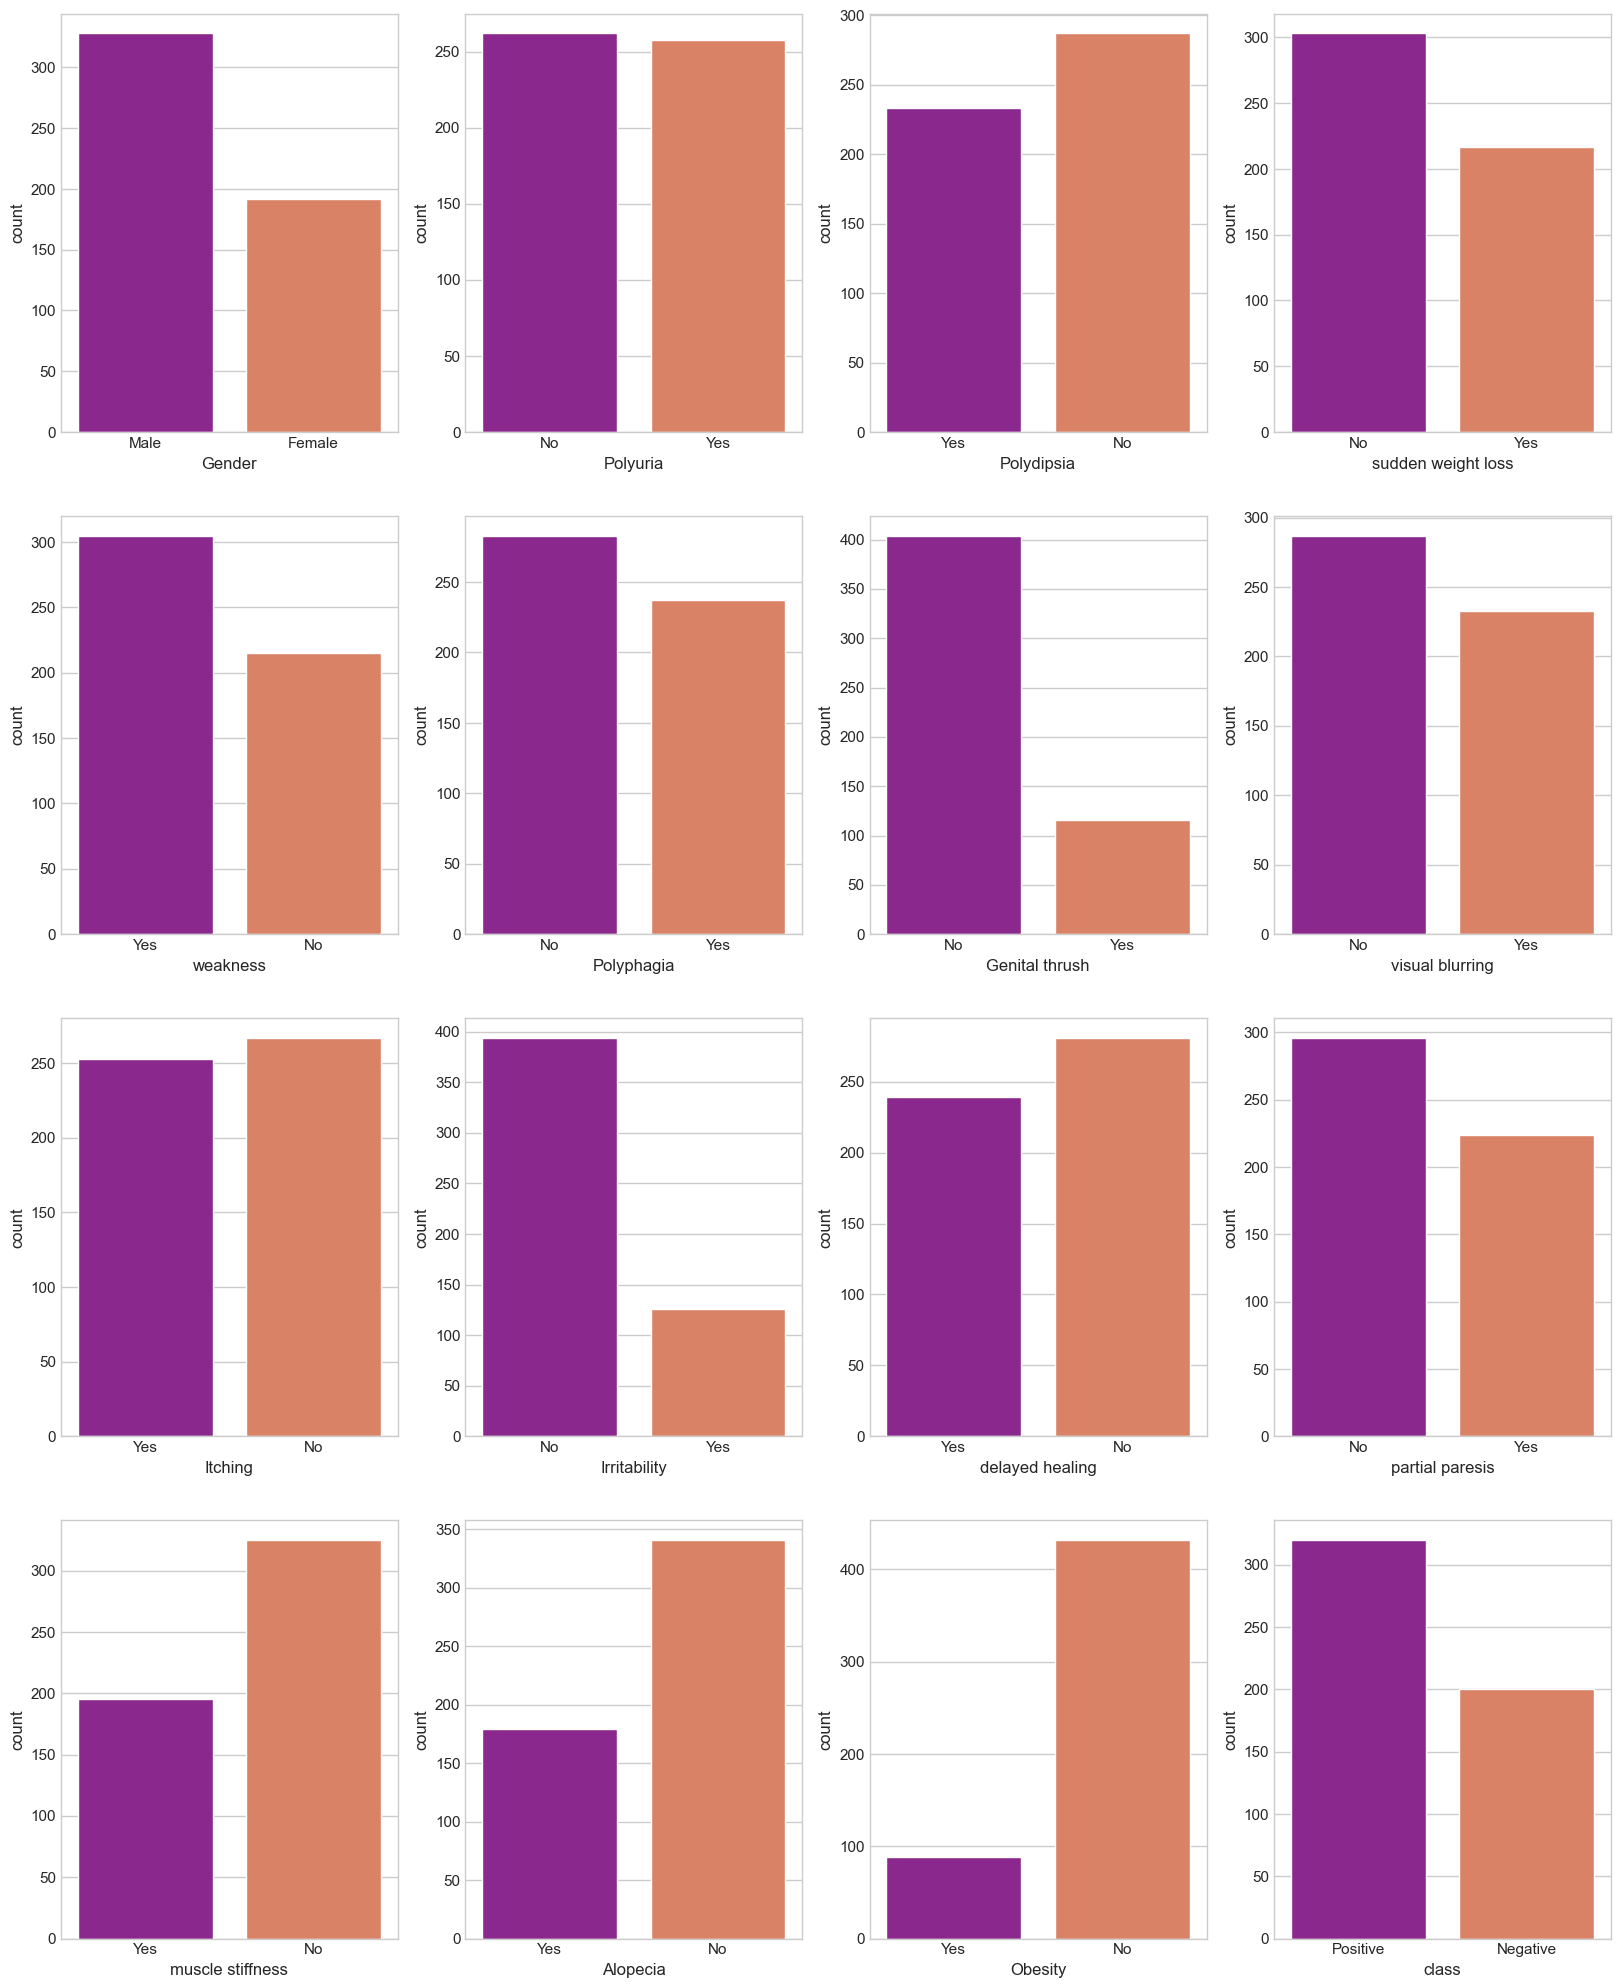

In [148]:
fig, ax = plt.subplots(4, 4, figsize = (20, 25))

for idx, val in enumerate(cat_cols):
    row, col = idx//4, idx%4
    sns.countplot(x = val, data = df, palette = 'plasma', ax = ax[row, col])

### Bivariate Analysis

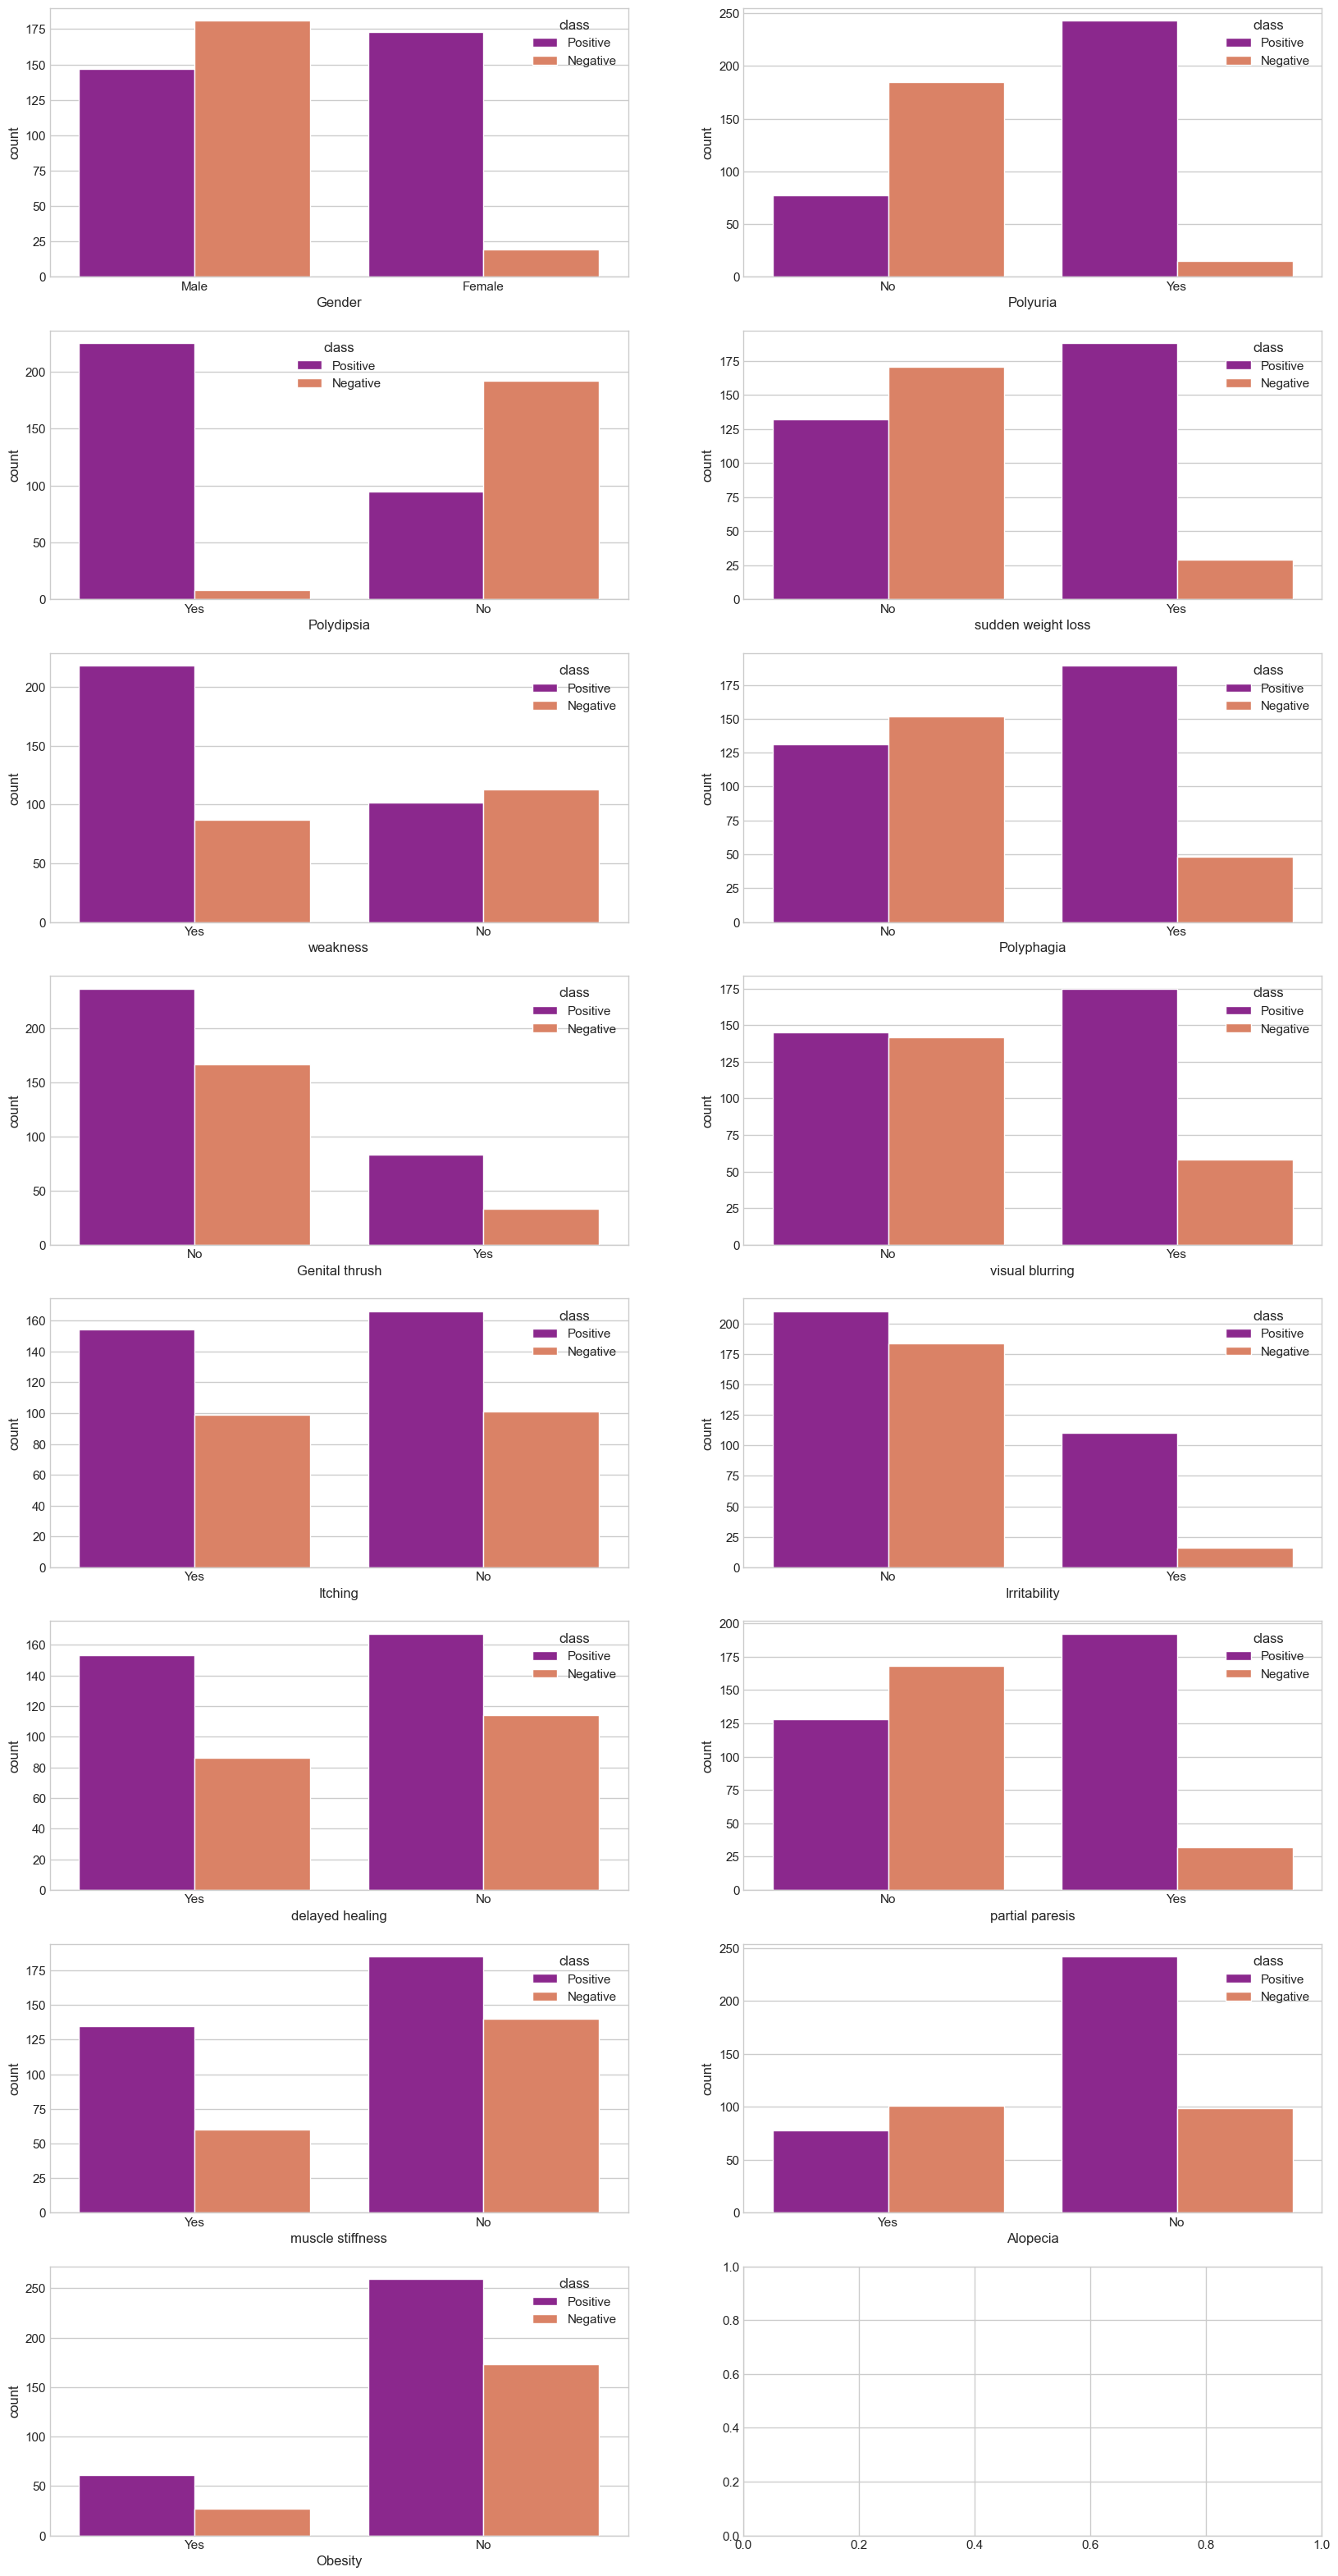

In [149]:
fig, ax = plt.subplots(8, 2, figsize = (20, 40))

for idx, val in enumerate(cat_cols[:-1]):
    row, col = idx//2, idx%2
    sns.countplot(x = val, data = df, hue = 'class', palette = 'plasma', ax = ax[row, col])

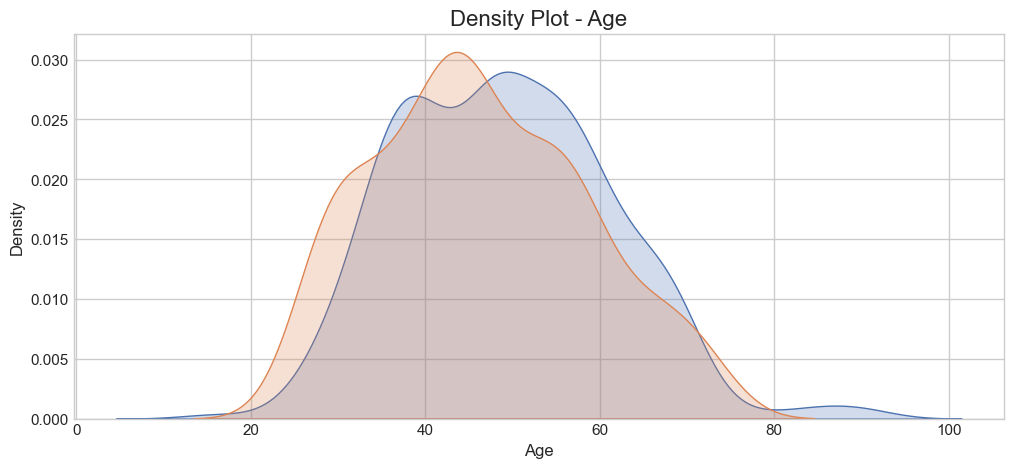

In [150]:
fig, ax = plt.subplots(figsize = (12, 5))

sns.kdeplot(df.loc[df['class'] == 'Positive', 'Age'], shade = True, label = 'Positive')
sns.kdeplot(df.loc[df['class'] == 'Negative', 'Age'], shade = True, label = 'Negative')

plt.title('Density Plot - Age', fontsize = 16)
plt.show()

In [151]:
df.groupby('class')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Negative,200.0,46.360000,12.080983,26.0,37.0,45.0,55.0,72.0
Positive,320.0,49.071875,12.097481,16.0,39.0,48.0,57.0,90.0


## Hypothesis Testing

- H0 : Age has no relation with the risk of diabetes
- H1 : Age is related with the risk of diabetes

In [152]:
age_pos = df.loc[df['class'] == 'Positive', 'Age']
age_neg = df.loc[df['class'] == 'Negative', 'Age']

In [153]:
age_pos = age_pos.sample(200)

In [154]:
print(age_pos.shape)
print(age_neg.shape)

(200,)
(200,)


### Assumptions for T-Test
- Variance should be equal in both the groups
- Residuals should be normally distributed

### Levene's Test - To check the variance equality

In [155]:
stats.levene(age_pos, age_neg)

LeveneResult(statistic=np.float64(0.004781047255967314), pvalue=np.float64(0.9449088344514037))

### To check whether the residuals are normally distributed

In [156]:
diff = np.array(age_pos) - np.array(age_neg)
diff

array([ 10,  34,   1,  14,   5,  23, -25,  -3,   4,   5,  26,  10,  16,
         8,   7,   9,  11, -19,  17,  -2,  47,  15,  20, -15, -19,  19,
        -2,  35,  24,  -7,   0,  16, -25, -14,  -4,  -1,  -8, -34, -15,
        21,  15, -18, -36,  12,   1,   0,   1,   0,   6,  -7,  16,   3,
       -29,  36,  26,  -7, -11, -12,  -4, -15,  33, -15,  12,  22,   3,
       -15,  16,  -6,  20,  12,  17,  18,   0,  22,  -2,  13,  32, -22,
       -21,  -3,  25,  18,  33, -19,  -8,  29,  23,   2,   7, -23,  25,
         8,   2, -15,  -1, -19,  -1,   6, -24,   8,  10,  -3,  -2,  16,
        -5,   7,  18,  20,  26, -12,  -6, -11,   9,  -3,   7,  14,  21,
        10, -24,   5,  22,  22,  14,  14,  18,  12,  25, -14,   3,  11,
       -18,   7, -20,  -1,   5,  12,   5, -32,   3,  -1,  12,   2,   7,
         0, -17,  -4,  -6,   5,  36, -11,  -5,   6,   1,   5,  -9, -37,
        38,  23,  24,  -8, -10,  -5,  -7, -22, -18,  18,  18,  28,  -4,
        15,  -5,  20,  -7, -25,   6, -18,  27,  -8,   8, -19,  2

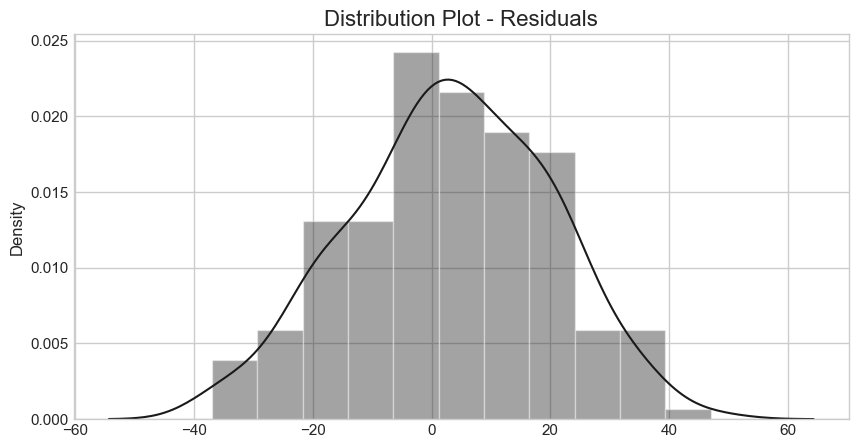

In [157]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.distplot(diff, color = 'k')

plt.title('Distribution Plot - Residuals', fontsize = 16)
plt.show()

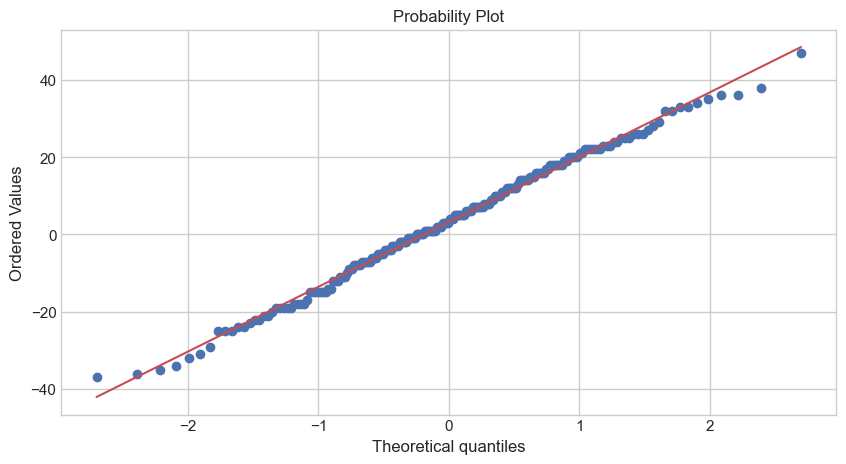

In [158]:
fig, ax = plt.subplots(figsize = (10, 5))

stats.probplot(diff,plot = plt, dist = 'norm')
plt.show()

In [159]:
stats.shapiro(diff)

ShapiroResult(statistic=np.float64(0.9936416267420944), pvalue=np.float64(0.5483382325986745))

In [160]:
stats.ttest_ind(age_pos, age_neg)

TtestResult(statistic=np.float64(2.6409036344906993), pvalue=np.float64(0.008594056082142802), df=np.float64(398.0))

The independant T-Testing confirms that the difference in mean age between positive and negative classes is significant. The null hypothesis which says the age has no relation with the diabetes risk can be rejected.

## Feature Transformation

In [161]:
for col in cat_cols[1:-1]:
    df[col] = df[col].replace({'Yes' : 1, 'No' : 0})

In [162]:
df.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
159,38,Female,1,1,1,1,1,0,1,1,1,1,1,1,0,0,Positive
94,36,Female,1,1,0,1,1,0,1,1,0,1,1,0,0,0,Positive
268,45,Female,0,0,0,0,1,0,1,1,0,0,1,0,0,0,Positive
284,72,Male,1,0,0,0,1,0,1,1,0,1,1,1,1,0,Negative
484,48,Female,1,1,1,1,1,0,0,0,0,0,1,0,0,0,Positive
167,41,Male,1,1,1,1,1,1,1,1,1,0,0,0,0,1,Positive
513,62,Female,1,1,1,1,0,0,1,0,0,0,1,0,0,1,Positive
390,47,Male,0,0,0,0,0,0,0,0,1,0,1,0,0,1,Negative
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
301,47,Female,0,0,1,1,1,0,0,0,0,0,0,1,0,0,Positive


In [163]:
df = pd.get_dummies(df, columns = ['Gender'], drop_first = True)

In [164]:
df.head()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender_Male
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive,True
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive,True
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive,True
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive,True
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive,True


In [165]:
df['class'].replace({'Positive' : 1, 'Negative' : 0}, inplace = True)

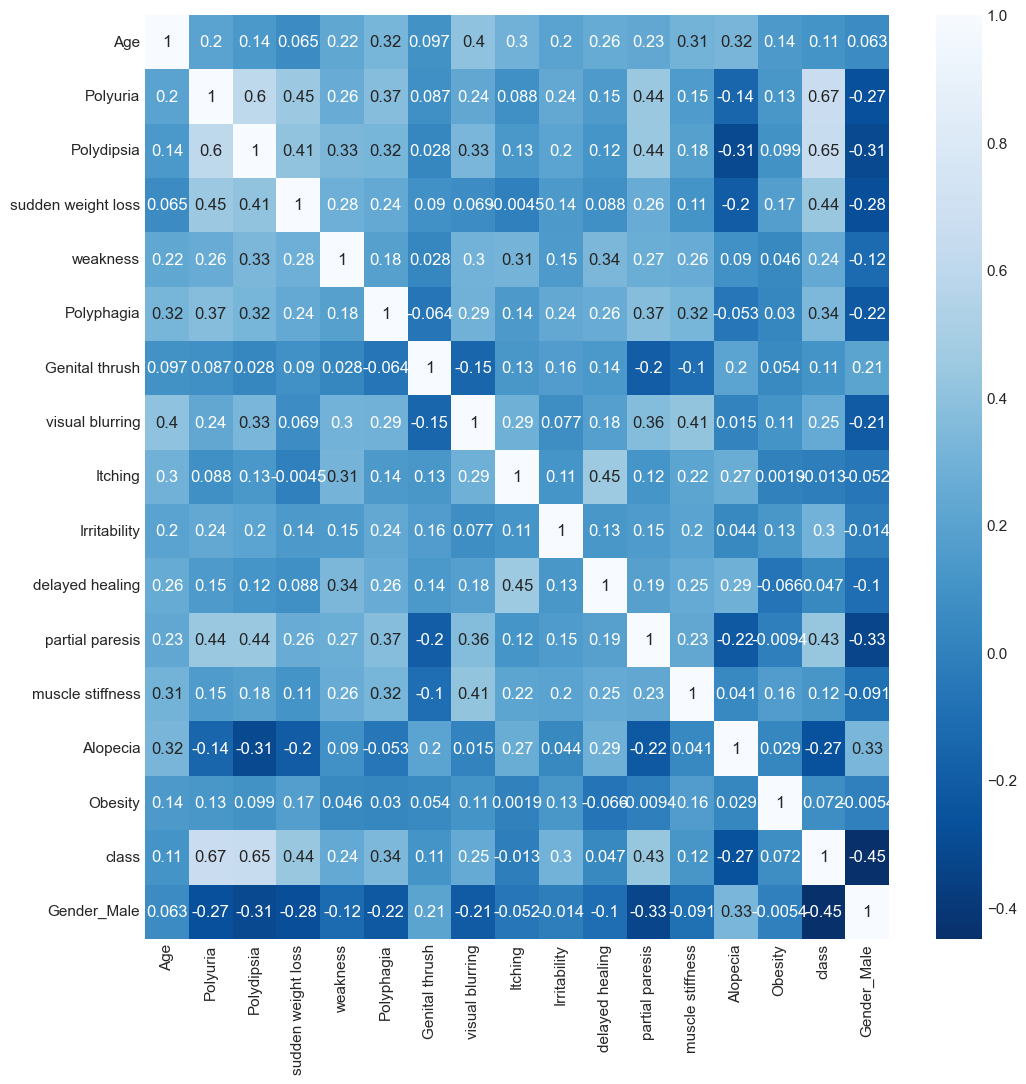

In [166]:
fig, ax = plt.subplots(figsize = (12, 12))

sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')
plt.show()

In [167]:
df.corr()['class'].sort_values(ascending = False)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender_Male          -0.449233
Name: class, dtype: float64

In [168]:
selected_cols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'partial paresis', 'Gender_Male',
                 'class']

In [169]:
df_sel = df[selected_cols]

## Predictive Modelling

### Baseline Model

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
sv = SVC(probability=True)

In [171]:
X = df_sel.drop('class', axis = 1)
y = df_sel['class']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,
                                                   random_state = 42)

In [173]:
lr = LogisticRegression(solver = 'liblinear')
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
sv = SVC(kernel='linear', probability=True, random_state=42)

In [174]:
acc = pd.DataFrame()
algorithm = []
training = []
testing = []
f1 = []

for i in [lr, dt, rf, knn, nb, sv]:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    algorithm.append(str(model))
    training.append(model.score(X_train, y_train))
    testing.append(accuracy_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

In [175]:
acc['Model'] = algorithm
acc['Training Score'] = training
acc['Testing Score'] = testing
acc['F1 Score'] = f1

In [176]:
acc

,Model,Training Score,Testing Score,F1 Score
0,LogisticRegression(solver='liblinear'),0.887019,0.884615,0.906250
1,DecisionTreeClassifier(),0.894231,0.923077,0.935484
2,RandomForestClassifier(),0.894231,0.961538,0.968750
3,KNeighborsClassifier(),0.894231,0.961538,0.968750
4,GaussianNB(),0.894231,0.961538,0.968750
5,"SVC(kernel='linear', probability=True, random_...",0.887019,0.923077,0.939394


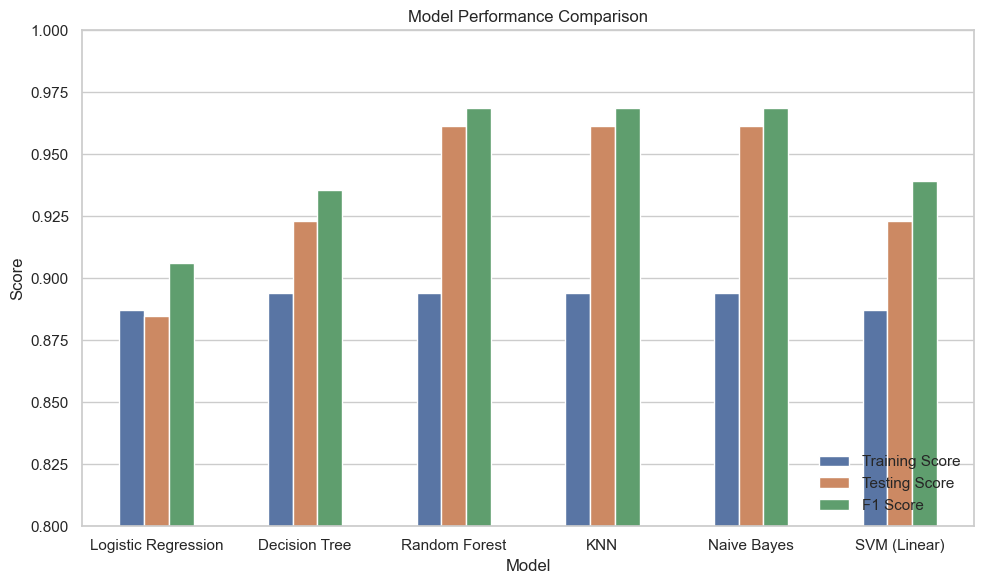

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Clean model names for x-axis
clean_names = [
    "Logistic Regression", 
    "Decision Tree", 
    "Random Forest", 
    "KNN", 
    "Naive Bayes", 
    "SVM (Linear)"
]

# Assign clean names
acc['Model'] = clean_names

# Melt the DataFrame for seaborn
acc_melted = acc.melt(id_vars='Model', 
                      value_vars=['Training Score', 'Testing Score', 'F1 Score'],
                      var_name='Metric', 
                      value_name='Score')

# Increase figure size
plt.figure(figsize=(10, 6))

# Create bar plot with thinner bars
sns.barplot(data=acc_melted, x='Model', y='Score', hue='Metric', width=0.5)

# Rotate x-axis labels
plt.xticks(rotation=0, ha='center')

# Add title and labels
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0.8, 1.0)

plt.tight_layout()
plt.legend(loc='lower right')
plt.show()


### Voting Classifier

The models which had best accuracy and F1 scores are used in Voting Classifier as base estimators. The output from all the four models will be combined (based on majority) to give out the final output.

In [178]:
classifiers = [('NB', nb), ('KNN', knn), ('SVC', sv), ('DT', dt)]


In [179]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
sv = SVC(probability=True, random_state=42)  # This is REQUIRED

vc = VotingClassifier(estimators = classifiers, voting='soft')


In [180]:
vc

VotingClassifier(estimators=[('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier()),
                             ('SVC',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('DT', DecisionTreeClassifier())],
                 voting='soft')

In [181]:
vc_class = vc.fit(X_train, y_train)
y_pred = vc_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9615384615384616
0.96875


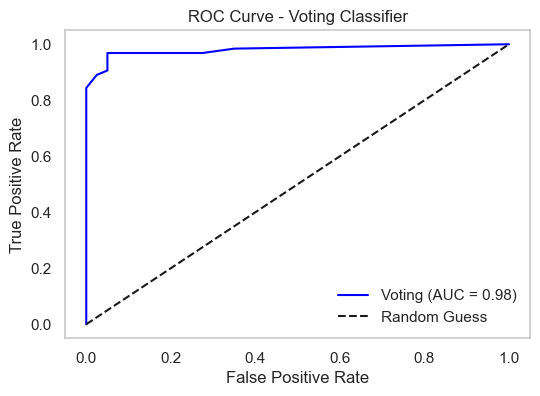

In [182]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = vc_class.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'Voting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend()
plt.grid()
plt.show()


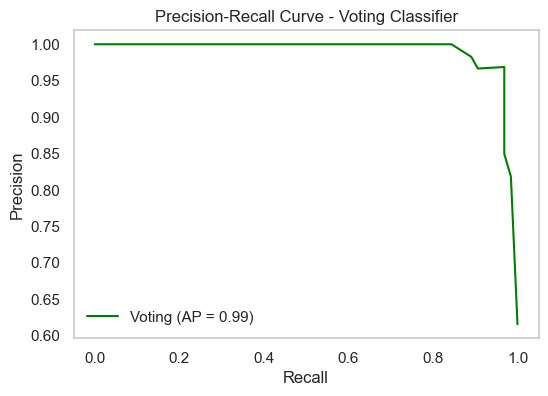

In [183]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = vc_class.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
ap_score = average_precision_score(y_test, y_scores)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', label=f'Voting (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Voting Classifier')
plt.legend()
plt.grid()
plt.show()


Voting Classifier Mean F1 CV Score: 0.9144


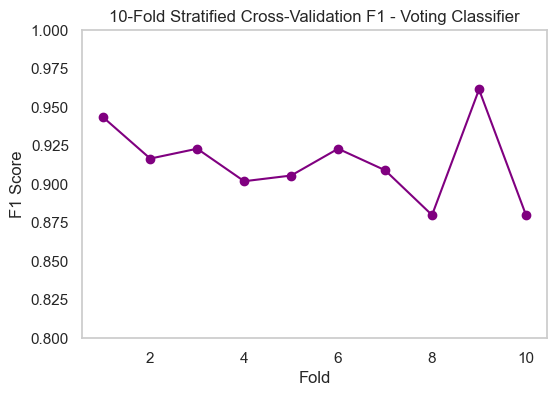

Mean f1: 0.9144467271537196


In [184]:
vc = VotingClassifier(estimators=classifiers, voting='soft')

# Change from 5-fold to 10-fold cross-validation
skf10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(vc, X_train, y_train, cv=skf10, scoring='f1')

print(f'Voting Classifier Mean F1 CV Score: {np.mean(cv_scores):.4f}')

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), cv_scores, marker='o', color='purple')
plt.title('10-Fold Stratified Cross-Validation F1 - Voting Classifier')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.ylim(0.8, 1.0)  # Adjusting y-axis to match the other plots
plt.grid()
plt.show()

print("Mean f1:", np.mean(cv_scores))

The accuracy and F1 score are good, but not higher than the baseline model. We'll try bagging techniques in further steps.

### Bagging Classifier

In [185]:
from sklearn.ensemble import BaggingClassifier

In [186]:
bc = BaggingClassifier(n_estimators = 200, oob_score = True, n_jobs = -1, random_state = 56)

In [187]:
bc_class = bc.fit(X_train, y_train)
y_pred = bc_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9615384615384616
0.96875


Bagging Classifier gives the best accuracy and F1 score. Let's also check out the Out-Of-Bag score since we are using oob observations as the validation set.

In [188]:
bc.oob_score_

0.8725961538461539

In [189]:
for i in range(100, 500, 100):
    bc = BaggingClassifier(n_estimators = i, max_features = 0.6, n_jobs = -1, random_state = 56)
    bc_class = bc.fit(X_train, y_train)
    y_pred = bc_class.predict(X_test)
    print('Estimators :', i)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('F1-Score :', f1_score(y_test, y_pred))

Estimators : 100
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 200
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 300
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 400
Accuracy : 0.9615384615384616
F1-Score : 0.96875


In [190]:
confusion_matrix(y_test, y_pred)

array([[38,  2],
       [ 2, 62]])

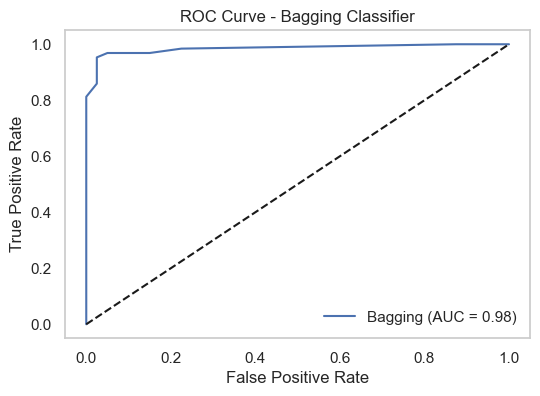

In [191]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)

y_proba = bag.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Bagging (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Classifier')
plt.legend()
plt.grid()
plt.show()


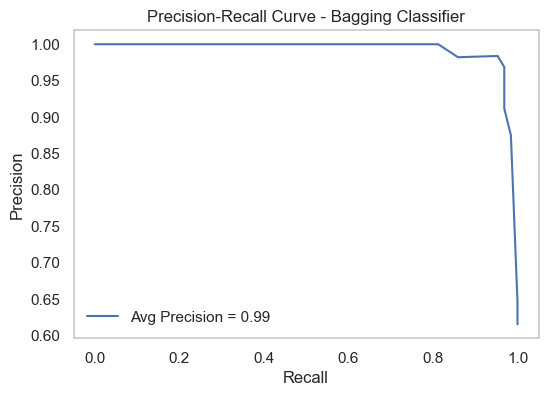

In [192]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Bagging Classifier')
plt.legend()
plt.grid()
plt.show()


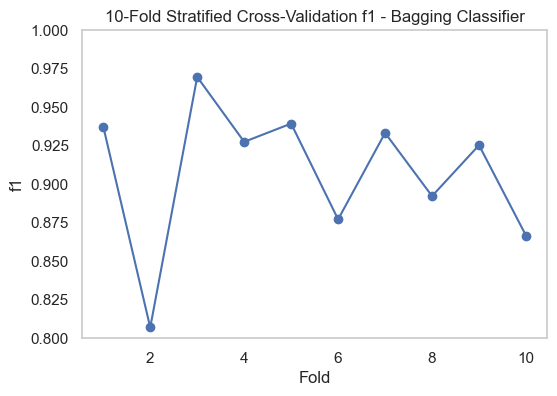

Mean f1: 0.9076018493926808


In [193]:
cv_scores = cross_val_score(bag, X, y, cv=skf, scoring='f1')

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('f1')
plt.title('10-Fold Stratified Cross-Validation f1 - Bagging Classifier')
plt.ylim(0.8, 1.0)
plt.grid()
plt.show()

print("Mean f1:", np.mean(cv_scores))


### Boosting

Boosting techniques focus on giving more weightage to the misclassified entries from the previous tree in the model. Two techniques are tried out here,
- AdaBoost
- GradientBoosting

#### AdaBoost Classifier

In [194]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [195]:
abc = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1, random_state = 60)

In [196]:
abc_class = abc.fit(X_train, y_train)
y_pred = abc_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9230769230769231
0.9393939393939394


In [197]:
for i in range(100, 600, 100):
    abc = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 4),
                             n_estimators = i, learning_rate = 0.1, random_state = 60)
    abc_class = abc.fit(X_train, y_train)
    y_pred = abc_class.predict(X_test)
    print('Estimators :', i)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('F1-Score :', f1_score(y_test, y_pred))

Estimators : 100
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 200
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 300
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 400
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 500
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419


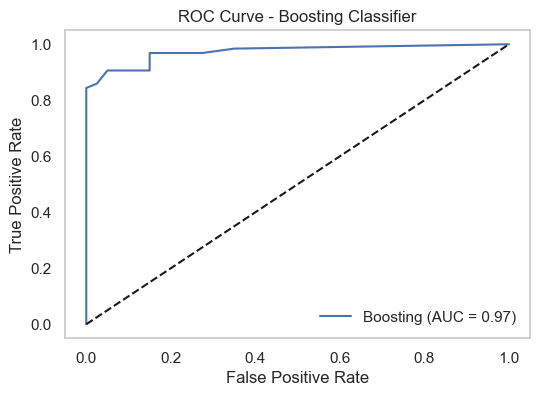

In [198]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc

boost = AdaBoostClassifier(random_state=42)
boost.fit(X_train, y_train)

y_proba = boost.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Boosting Classifier')
plt.legend()
plt.grid()
plt.show()


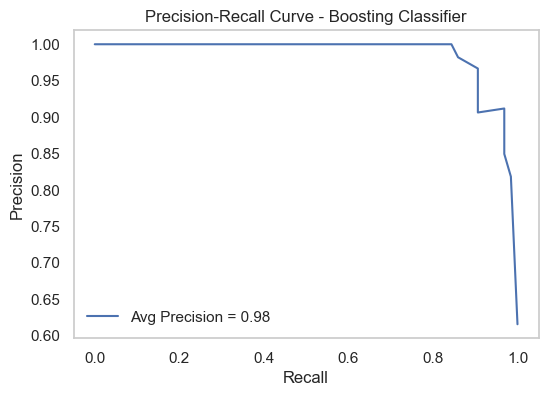

In [199]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Boosting Classifier')
plt.legend()
plt.grid()
plt.show()


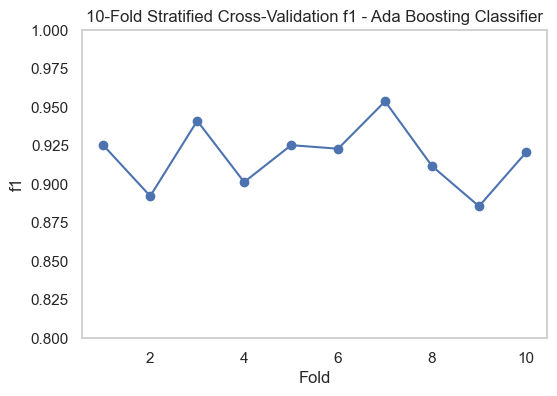

Mean f1: 0.9180675871411506


In [200]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(boost, X, y, cv=skf, scoring='f1')

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('f1')
plt.title('10-Fold Stratified Cross-Validation f1 - Ada Boosting Classifier')
plt.ylim(0.8, 1.0)
plt.grid()
plt.show()

print("Mean f1:", np.mean(cv_scores))


#### Gradient Boosting Classifier

In [201]:
gbm = GradientBoostingClassifier(n_estimators = 200, subsample = 0.8, random_state = 62)

In [202]:
gbm_class = gbm.fit(X_train, y_train)
y_pred = gbm_class.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9615384615384616
0.96875


In [203]:
for i in range(100, 600, 100):
    gbm = GradientBoostingClassifier(n_estimators = i, subsample = 0.8, random_state = 62)
    gbm_class = gbm.fit(X_train, y_train)
    y_pred = gbm_class.predict(X_test)
    print('Estimators :', i)
    print('Accuracy :', accuracy_score(y_test, y_pred))
    print('F1-Score :', f1_score(y_test, y_pred))

Estimators : 100
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 200
Accuracy : 0.9615384615384616
F1-Score : 0.96875
Estimators : 300
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 400
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419
Estimators : 500
Accuracy : 0.9230769230769231
F1-Score : 0.9354838709677419


The Gradient Boosting Classifier gives the best accuracy and F1 score of ~97%. This model correctly classifies 100 observations and misclassifies only 4 of them, as confirmed in the confusion matrix above.

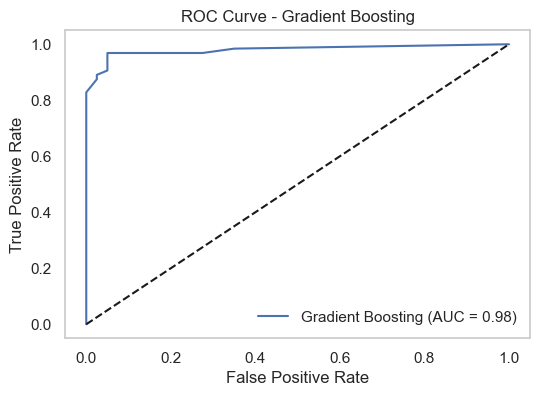

In [204]:
from sklearn.metrics import roc_curve, auc

gbm = GradientBoostingClassifier(n_estimators=200, subsample=0.8, random_state=62)
gbm_class = gbm.fit(X_train, y_train)

y_proba = gbm_class.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.grid()
plt.show()


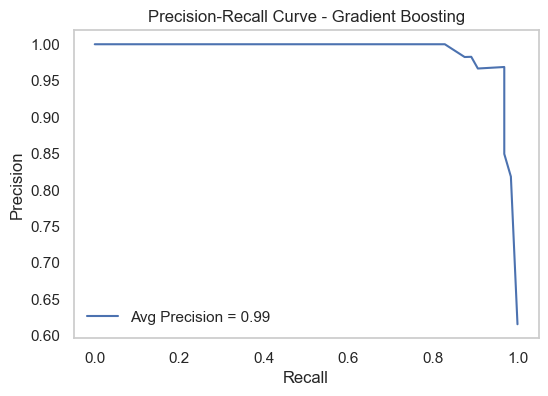

In [205]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gradient Boosting')
plt.legend()
plt.grid()
plt.show()


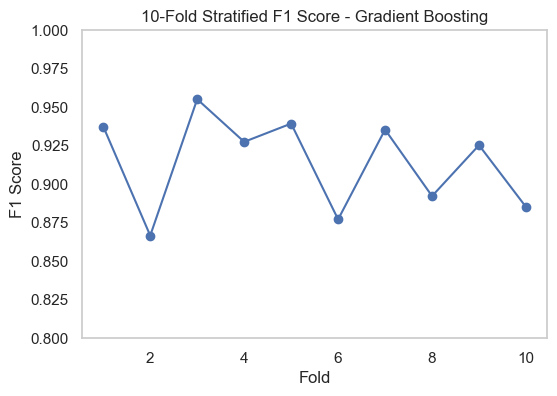

Gradient Boosting - Mean F1 Score: 0.9141924300240957


In [206]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define stratified folds
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores using StratifiedKFold
cv_scores = cross_val_score(gbm, X, y, cv=skf, scoring='f1')

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('10-Fold Stratified F1 Score - Gradient Boosting')
plt.ylim(0.8, 1.0)
plt.grid()
plt.show()

# Print mean accuracy
print("Gradient Boosting - Mean F1 Score:", np.mean(cv_scores))


In [207]:
# Save the model using pickle
import pickle

# Assuming 'gbm' is your best model
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(gbm, file)
